In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import statsmodels.api as sm
import tensorflow as tf

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)

In [3]:
df=pd.read_csv('airline-passengers.csv')
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df=df.set_index('Month')

In [5]:
df

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [6]:
df=df.sort_index()

In [7]:
df

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


<AxesSubplot:xlabel='Month'>

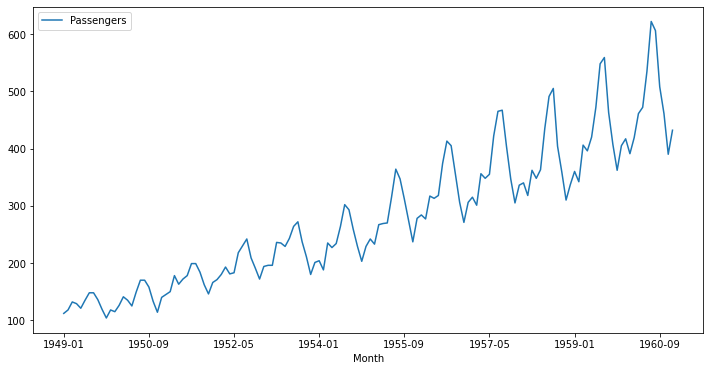

In [8]:
df.plot(figsize=(12,6))

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose



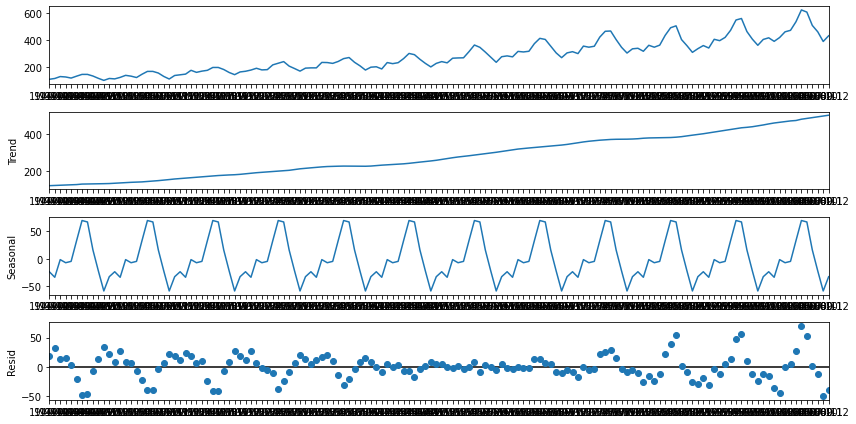

In [10]:
rcParams['figure.figsize'] = 12,6
decomposition = sm.tsa.seasonal_decompose(df, model='additive',freq=12, extrapolate_trend = 12)
fig = decomposition.plot()
plt.show()

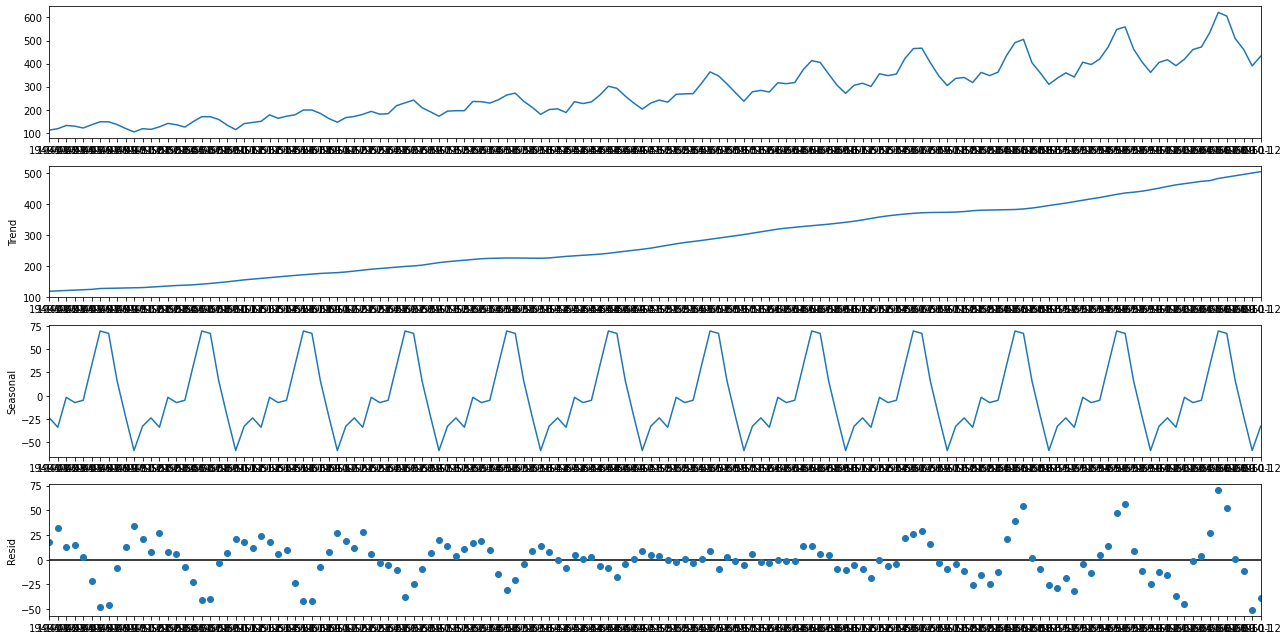

In [11]:
rcParams['figure.figsize'] = 18,9
decomposition = sm.tsa.seasonal_decompose(df, model='additive',freq=12, extrapolate_trend = 12)
fig = decomposition.plot()
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller
df_adf=adfuller(df)

In [13]:
df_adf

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [ ]:
# Adafuller test is just to check whether data is stationary or not but for LSTM it doesn't bother much 
# Althought it impact for Unsupervised Learning Time Series Forecasting....

In [ ]:
# Implementing 

In [14]:
train = df.iloc[:132]
test = df.iloc[132:]

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [17]:
scaled_train[:10]

array([[0.01758242],
       [0.03076923],
       [0.06153846],
       [0.05494505],
       [0.03736264],
       [0.06813187],
       [0.0967033 ],
       [0.0967033 ],
       [0.07032967],
       [0.03296703]])

In [18]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [21]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(generator,epochs=48)

Epoch 1/48
120/120 [==============================] - 2s 4ms/step - loss: 0.0299
Epoch 2/48
120/120 [==============================] - 0s 4ms/step - loss: 0.0130
Epoch 3/48
120/120 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 4/48
120/120 [==============================] - 1s 4ms/step - loss: 0.0099
Epoch 5/48
120/120 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 6/48
120/120 [==============================] - 0s 3ms/step - loss: 0.0079
Epoch 7/48
120/120 [==============================] - 0s 4ms/step - loss: 0.0099
Epoch 8/48
120/120 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 9/48
120/120 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 10/48
120/120 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 11/48
120/120 [==============================] - 0s 4ms/step - loss: 0.0061
Epoch 12/48
120/120 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 13/48
120/120 [====

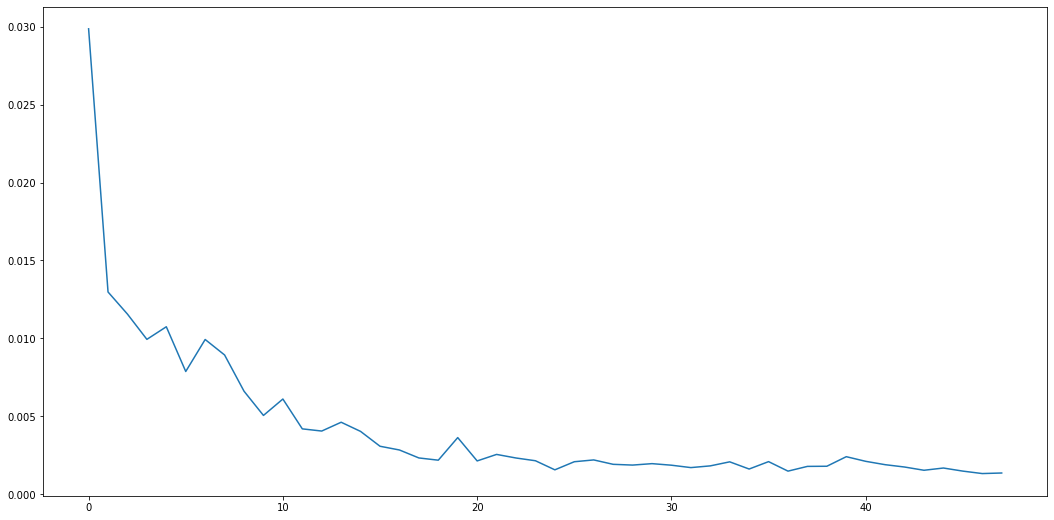

In [24]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [25]:
last_train_batch = scaled_train[-12:]


In [26]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [27]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 178ms/step


array([[0.62733716]], dtype=float32)

In [28]:
scaled_test[0]

array([0.68791209])

In [29]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 17ms/step


In [30]:
test_predictions


[array([0.62733716], dtype=float32),
 array([0.6135463], dtype=float32),
 array([0.6697898], dtype=float32),
 array([0.7016027], dtype=float32),
 array([0.77020913], dtype=float32),
 array([0.9165464], dtype=float32),
 array([1.0723078], dtype=float32),
 array([1.0938417], dtype=float32),
 array([0.91952455], dtype=float32),
 array([0.742566], dtype=float32),
 array([0.6579284], dtype=float32),
 array([0.6683841], dtype=float32)]

In [31]:
test.head()


,Passengers
Month,
1960-01,417
1960-02,391
1960-03,419
1960-04,461
1960-05,472


In [32]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[389.43840677],
       [383.16357189],
       [408.75435495],
       [423.2292273 ],
       [454.4451558 ],
       [521.02861398],
       [591.90006042],
       [601.69796073],
       [522.38367045],
       [441.86752522],
       [403.35742527],
       [408.1147542 ]])

In [33]:
test['Predictions'] = true_predictions

<AxesSubplot:xlabel='Month'>

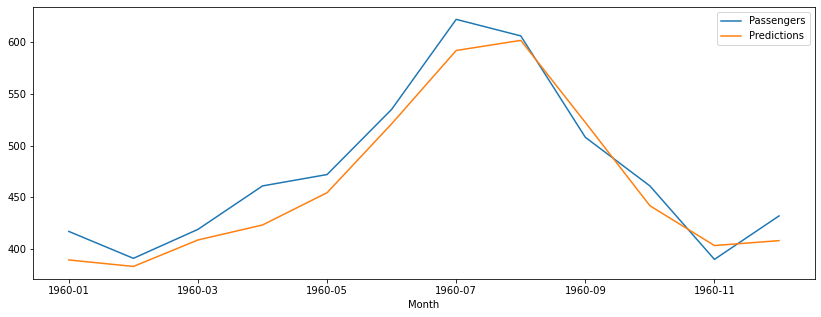

In [34]:
test.plot(figsize=(14,5))

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Passengers'],test['Predictions']))
print(rmse)

20.620396395524782
